<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Hierarchical clustering lab
---

For this exercise we are using the US Arrest data which is one of the datasets provided by R, more information can be found [here]( https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/USArrests.html).
It contains data on the rate of arrests for murder, assault and rape per 100000 inhabitants and the percentage of urban population per US state.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 

sns.set(font_scale=1.5)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
from sklearn import cluster, metrics
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster
from scipy.spatial.distance import pdist

#### 1. Load the dataset from the provided file

In [50]:
df = pd.read_csv('USArrests.csv')
df = df.rename(columns={'Unnamed: 0': 'States'})
df.head()

,States,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


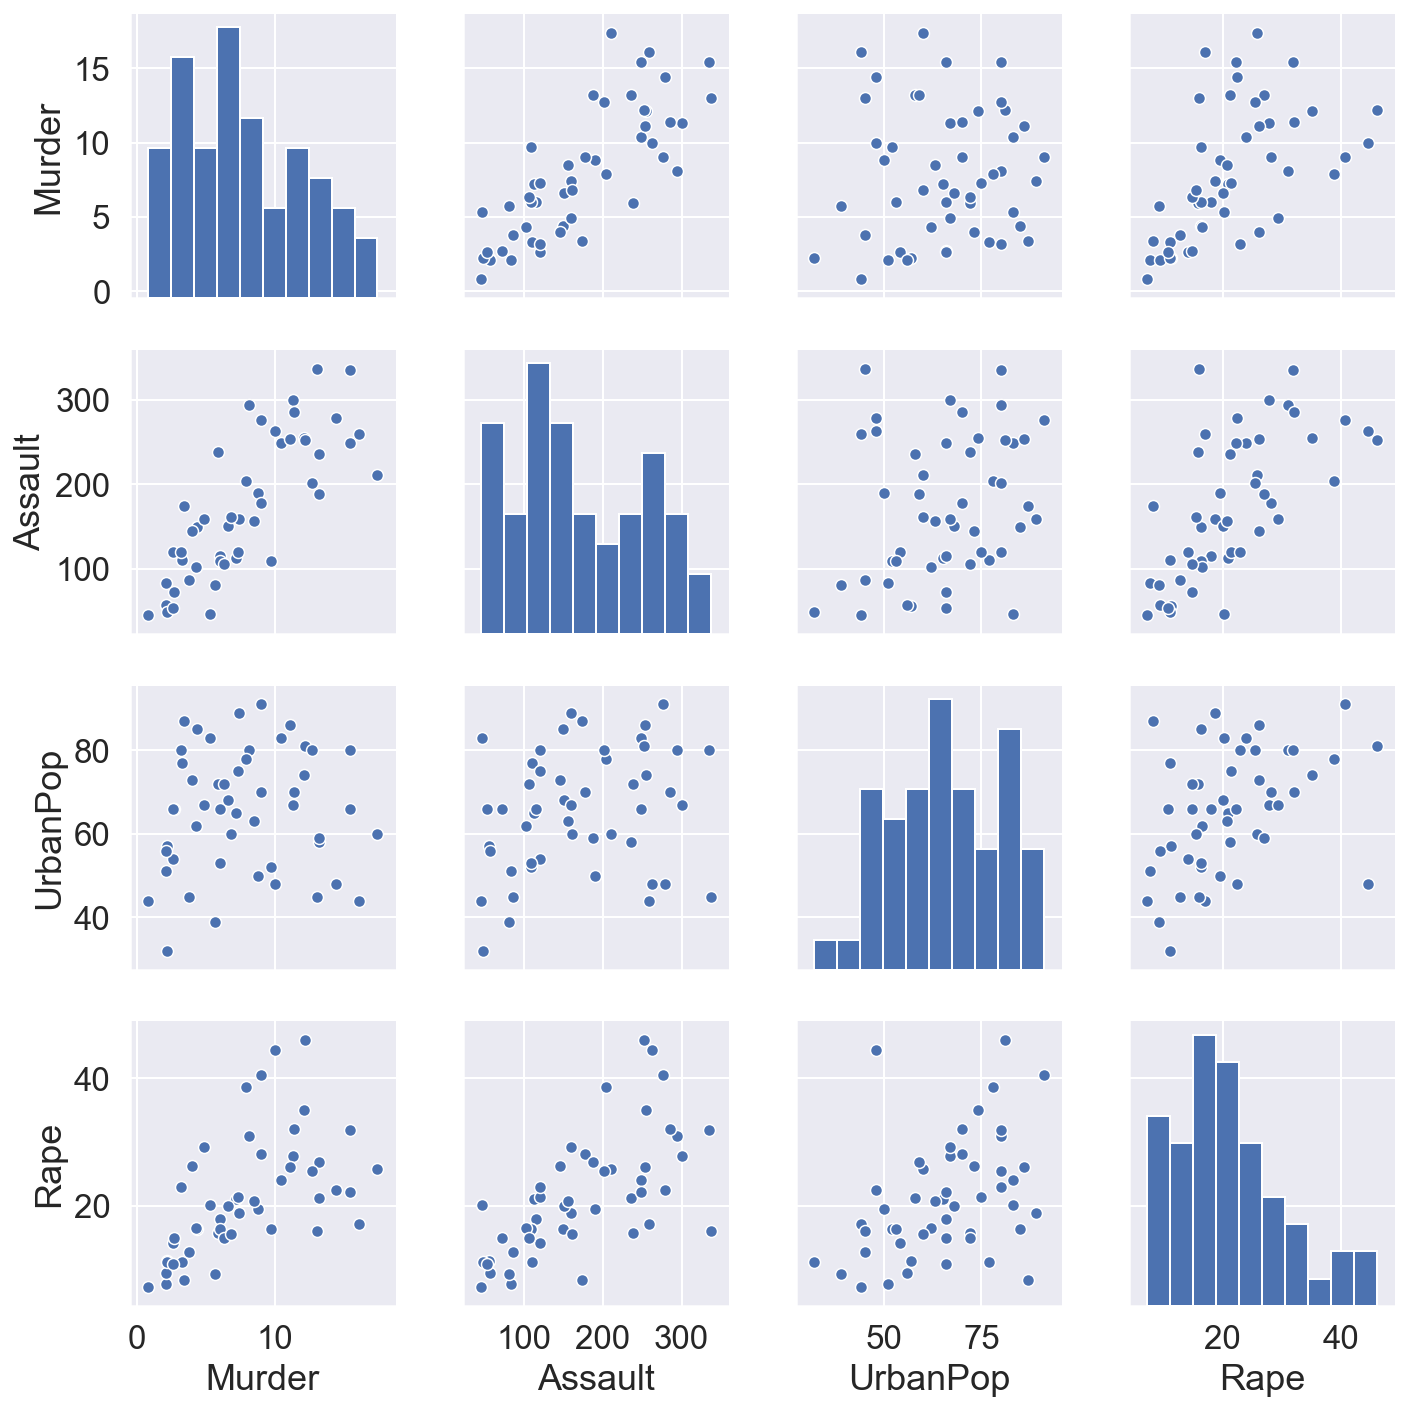

In [5]:
sns.pairplot(df)
plt.show()

#### 2. Standardize the data

In [12]:
from sklearn.preprocessing import StandardScaler

In [55]:
y = df.pop("States")

In [59]:
X=df.copy()

In [60]:
scaler = StandardScaler()
Xstd = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
Xstd

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,Murder,Assault,UrbanPop,Rape
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814
5,0.025976,0.402909,0.869548,1.883901
6,-1.040880,-0.736484,0.799761,-1.092723
7,-0.437875,0.815030,0.450825,-0.585834
8,1.765415,1.990786,1.009122,1.150530
9,2.229265,0.487757,-0.386621,0.492653


#### 3. Obtain the principal components for the rescaled data of 2.

- Determine the eigenvectors and explained variance ratio
- Plot the principal components versus each other

In [7]:
# pca = ...

In [73]:
from sklearn.decomposition import PCA

pca = PCA( n_components=2)
pca.fit(Xstd)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [76]:
cols = ['PC_{}'.format(i) for i in range(1, pca.n_components+1)]
X_pca = pd.DataFrame(pca.fit_transform(Xstd), columns=cols)
X_pca.head()

,PC_1,PC_2
0,0.985566,1.133392
1,1.950138,1.073213
2,1.763164,-0.745957
3,-0.141420,1.119797
4,2.523980,-1.542934


In [78]:
#hep_dict = {'PC'+str(i+1): pca.components_[i]
            #for i in range(len(Xstd))}

In [79]:
X_pca["States"]=y

In [82]:
X_pca

,PC_1,PC_2,States
0,0.985566,1.133392,Alabama
1,1.950138,1.073213,Alaska
2,1.763164,-0.745957,Arizona
3,-0.141420,1.119797,Arkansas
4,2.523980,-1.542934,California
5,1.514563,-0.987555,Colorado
6,-1.358647,-1.088928,Connecticut
7,0.047709,-0.325359,Delaware
8,3.013042,0.039229,Florida
9,1.639283,1.278942,Georgia


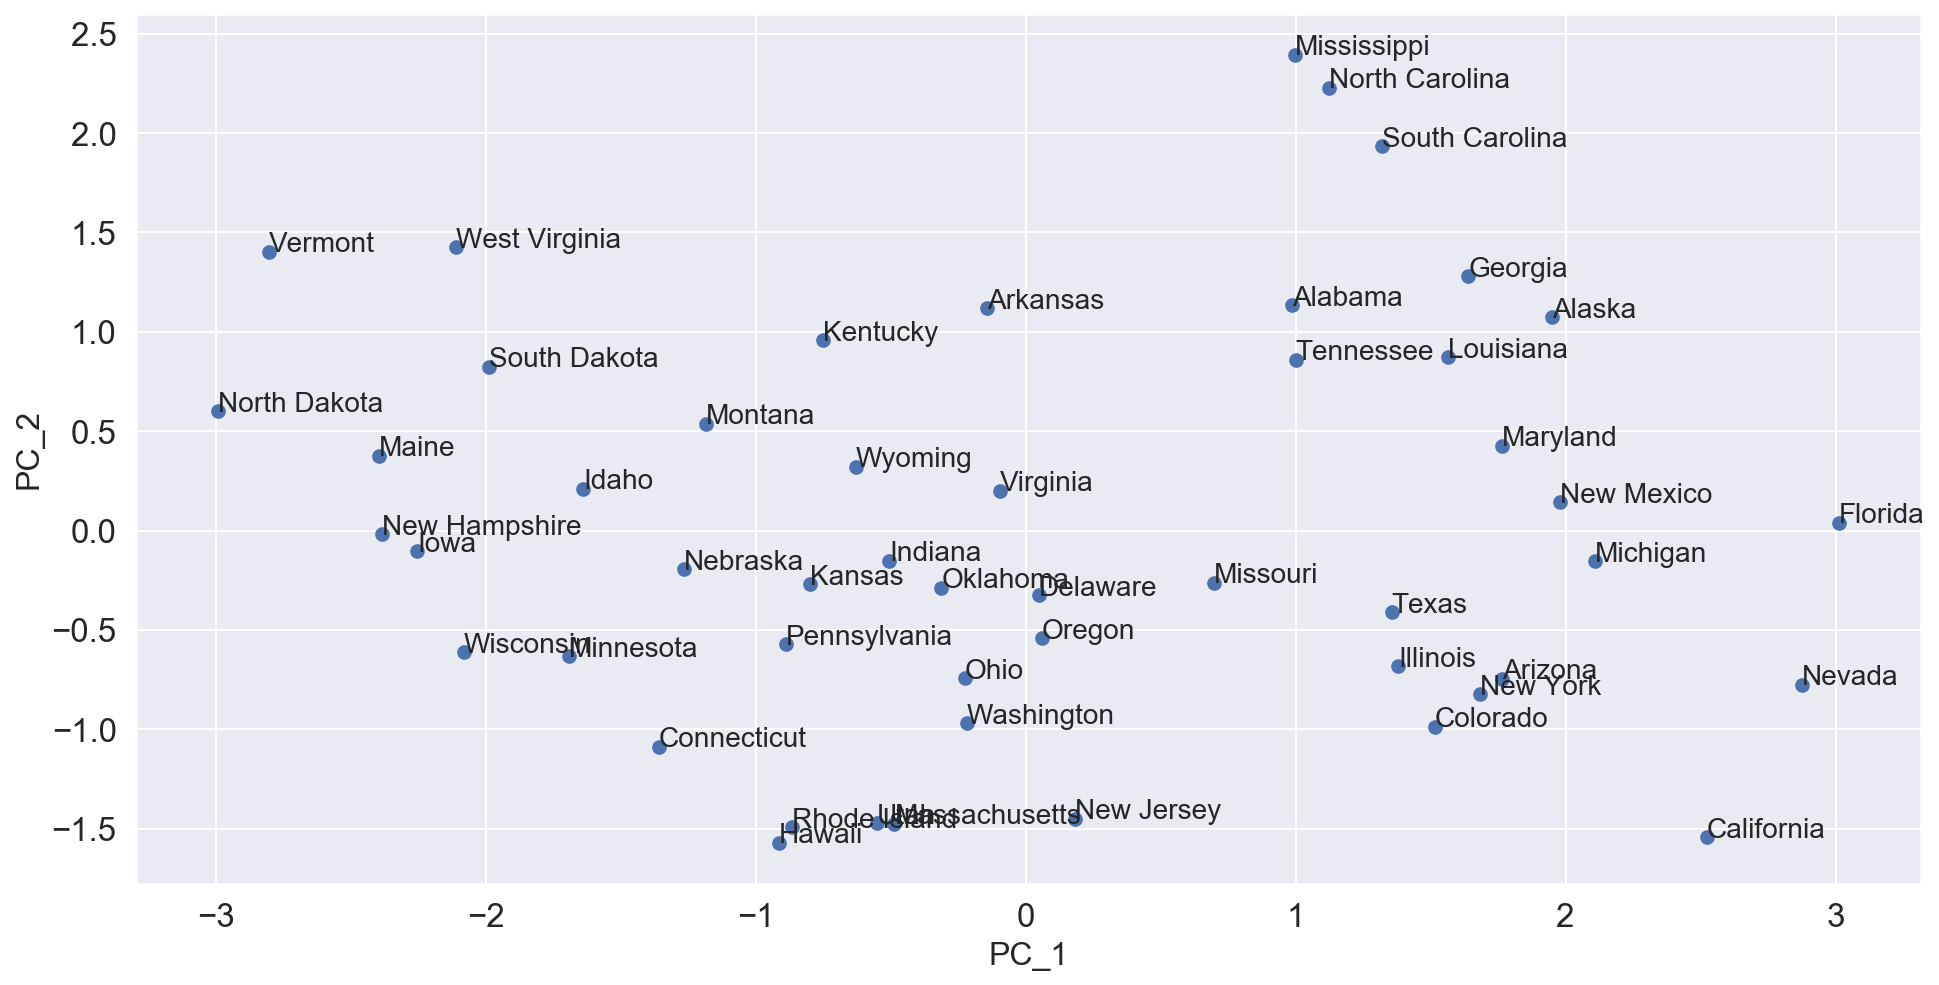

In [83]:
# With column names PC1,PC2 and states, the result from the PCA can be 
# plotted with the following code:

fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(X_pca.PC_1,X_pca.PC_2, s = 40, cmap = "Blues")
for i, xi in enumerate(X_pca['States']):
    ax.annotate(xi, (X_pca.iloc[i,0], X_pca.iloc[i,1]),fontsize=14)
ax.set_xlabel('PC_1',fontsize=16)
ax.set_ylabel('PC_2',fontsize=16)
plt.show()

#### 4. Perform hierarchical clustering on the rescaled dataset obtained in 2

- Calculate the cophenetic correlation and distances 
- Plot the resulting dendrogram
- Produce a scatter plot of the data using the cluster labels for coloring

In [84]:
Z = linkage(Xstd, method='ward', metric='euclidean')
Z.shape

(49, 4)

In [98]:
Xstd.head()

,Murder,Assault,UrbanPop,Rape
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814


In [89]:
link = pd.DataFrame(Z, columns=['cluster_index_left', 'cluster_index_right', 'distance', 'support'])
link.head()


,cluster_index_left,cluster_index_right,distance,support
0,14.0,28.0,0.207944,2.0
1,12.0,31.0,0.353774,2.0
2,13.0,15.0,0.433124,2.0
3,22.0,48.0,0.499099,2.0
4,19.0,30.0,0.540825,2.0


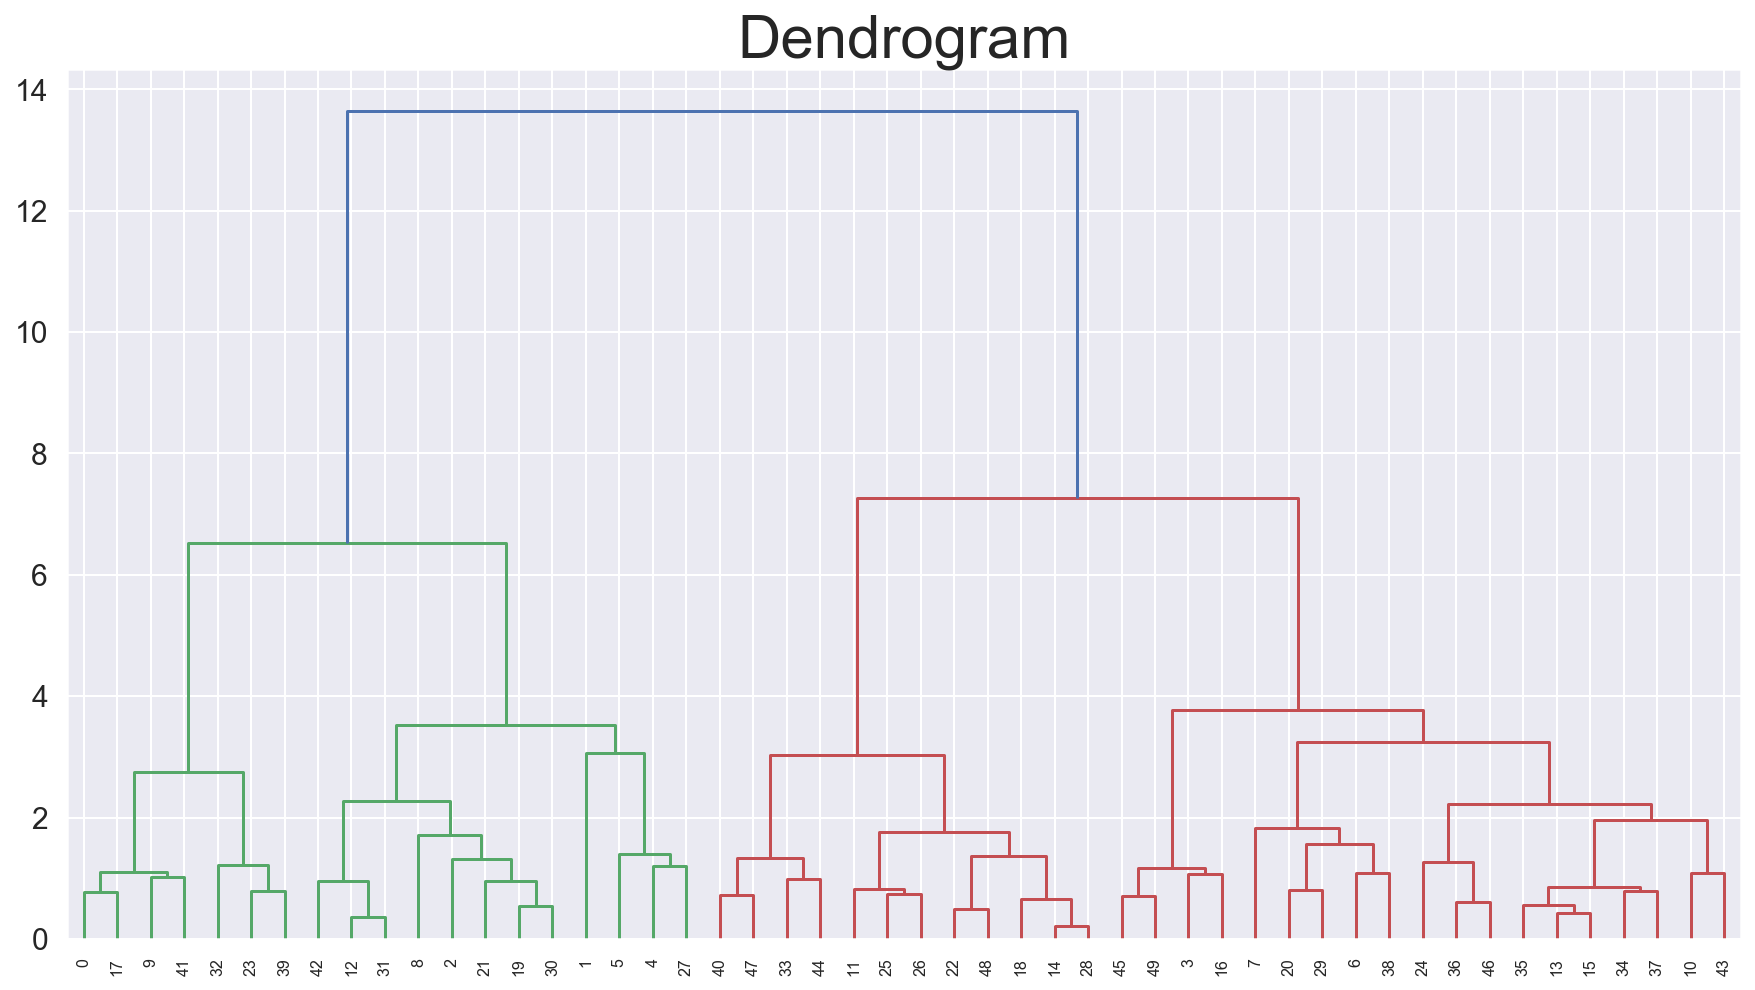

In [86]:
plt.figure(figsize=(15, 8))
dendrogram(
    Z,
    orientation='top',
    leaf_rotation=90.,  
    leaf_font_size=8.,
    color_threshold=10,
    #p = 10,
    #truncate_mode='level'
    #truncate_mode='lastp'
)
plt.yticks(fontsize=15.)
plt.title('Dendrogram',fontsize=30)
plt.show()


In [88]:
c, coph_dists = cophenet(Z, pdist(Xstd, metric='euclidean'))
c

0.6975265632370389

In [10]:
# dendrogram(...
# )

#### 5. Perform hierarchical clustering on the first two principal components obtained in 3

- Calculate the cophenetic correlation and distances 
- Plot the resulting dendrogram
- Do you observe any differences compared to clustering on all features done in 4?

In [95]:
X_pca.head()

,PC_1,PC_2,States
0,0.985566,1.133392,Alabama
1,1.950138,1.073213,Alaska
2,1.763164,-0.745957,Arizona
3,-0.141420,1.119797,Arkansas
4,2.523980,-1.542934,California


In [96]:
X_pca_num = X_pca.drop("States",1)

In [100]:
Z_2 = linkage(X_pca_num, method='ward', metric='euclidean')
Z_2.shape

(49, 4)

In [101]:
link_2 = pd.DataFrame(Z_2, columns=['cluster_index_left', 'cluster_index_right', 'distance', 'support'])
link_2.head()

,cluster_index_left,cluster_index_right,distance,support
0,20.0,43.0,0.064468,2.0
1,10.0,38.0,0.092461,2.0
2,2.0,31.0,0.111616,2.0
3,14.0,28.0,0.156081,2.0
4,23.0,32.0,0.208774,2.0


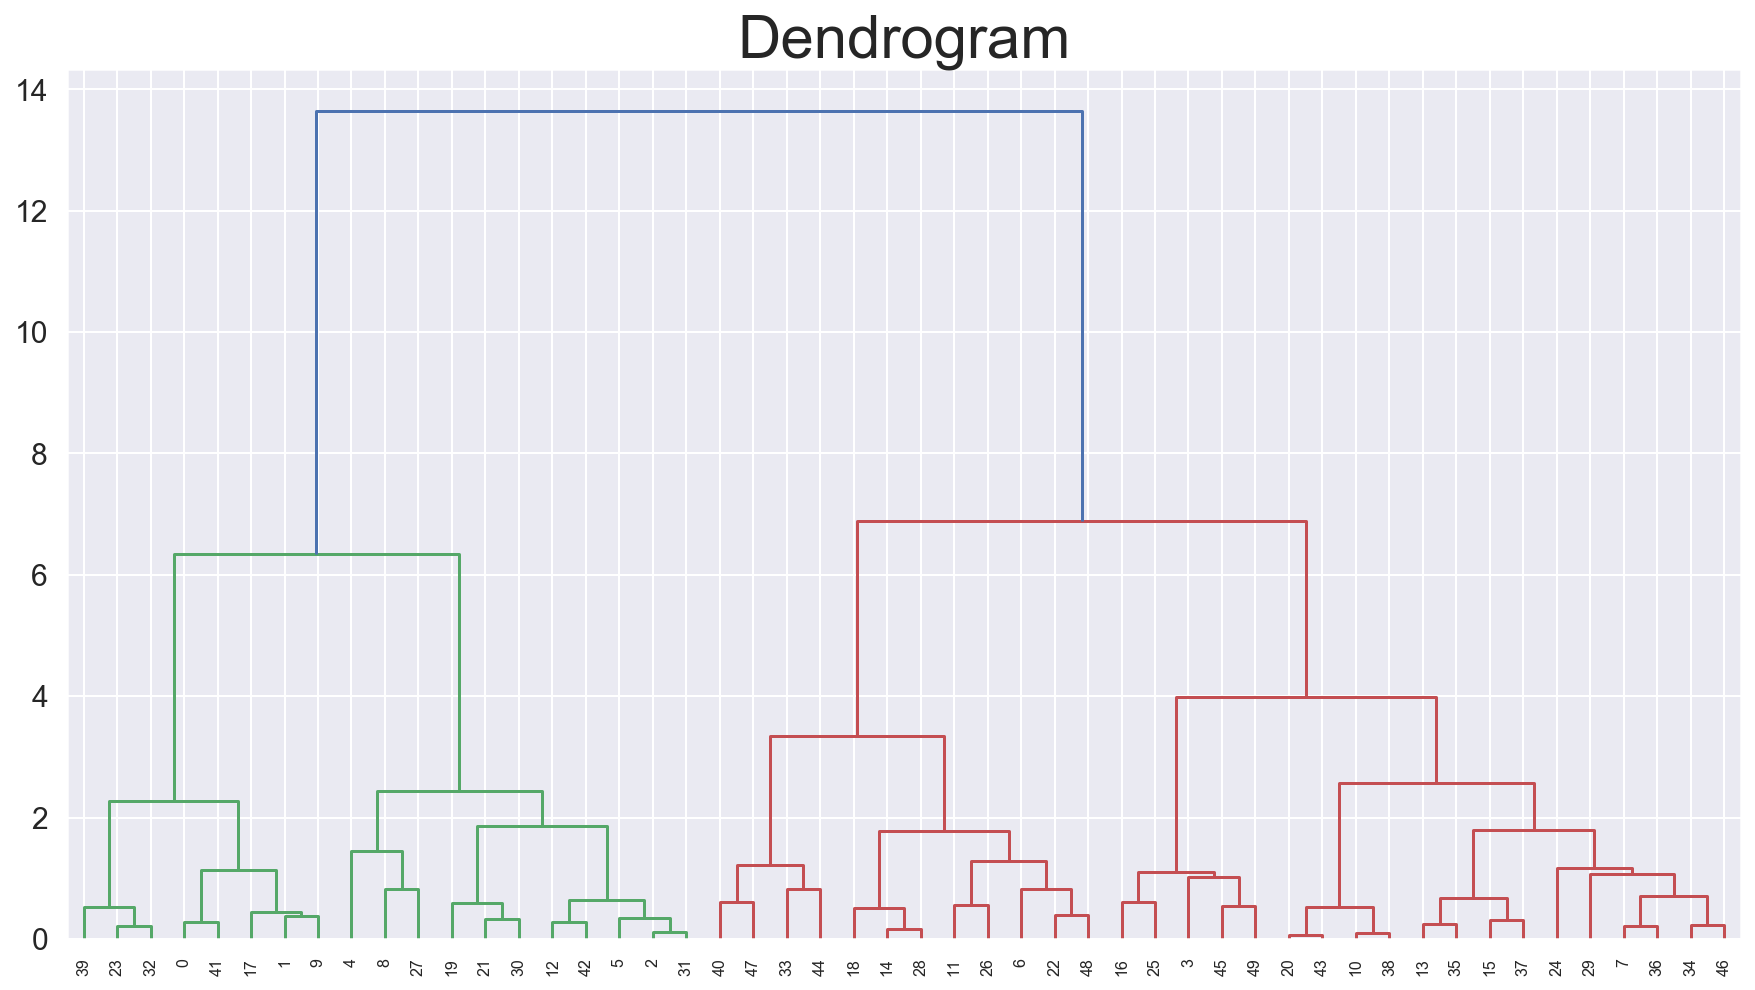

In [103]:
plt.figure(figsize=(15, 8))
dendrogram(
    Z_2,
    orientation='top',
    leaf_rotation=90.,  
    leaf_font_size=8.,
    color_threshold=10,
    #p = 10,
    #truncate_mode='level'
    #truncate_mode='lastp'
)
plt.yticks(fontsize=15.)
plt.title('Dendrogram',fontsize=30)
plt.show()

#### 6. Now take the clustering from 5 and obtain cluster labels for the data points using the fcluster function. 

- Vary the threshold
- Produce a plot which shows the number of different clusters obtained versus the threshold value

In [105]:
max_value = 10 # pairwise distance
clusters = fcluster(Z, max_value, criterion='distance')
np.unique(clusters).shape


(2,)

In [108]:
max_value = 2 # pairwise distance
clusters = fcluster(Z_2, max_value, criterion='distance')
np.unique(clusters).shape


(9,)

#### 7. Continue with the results from 5 and 6. 

- Set your threshold so that 4 different clusters are obtained. 
- Produce a scatter plot of the data with the points colored according to their cluster label.

In [110]:
max_value = 6 # pairwise distance
clusters = fcluster(Z_2, max_value, criterion='distance')
np.unique(clusters).shape

(4,)

#### Bonus: Annotate the points in the scatter plot by the state names and identify the states belonging to the same cluster.

In [111]:
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
from ipywidgets import *

In [112]:
def plot_dendogram(X,  color_threshold=100, leaf_rotation=90, leaf_font_size=8.,
                   method='ward', metric='euclidean', ax=None, figsize=(15,15)):
    
    # Data prep
    
    Z = linkage(Xstd, method=method, metric=metric)
    
    # plotting
    if ax==None:
        fig, ax = plt.subplots(figsize=figsize)
        ax.set_title('Dendrogram')
        ax.set_xlabel('Index Numbers')
        ax.set_ylabel('Distance')
        dendrogram(
            Z,
            ax=ax,
            color_threshold=color_threshold, 
            leaf_rotation=leaf_rotation, 
            leaf_font_size=leaf_font_size
        )
    else:
        ax.set_title('Dendrogram')
        ax.set_xlabel('Index Numbers')
        ax.set_ylabel('Distance')
        dendrogram(
            Z,
            ax=ax,
            color_threshold=color_threshold, 
            leaf_rotation=leaf_rotation, 
            leaf_font_size=leaf_font_size
        )

    return ax
    


def plot_dist_thresh(X, max_value=100, color_threshold = 1, method='ward', metric='euclidean'):
    
    Z = linkage(Xstd, method=method, metric=metric)
    clusters = fcluster(Z, max_value, criterion='distance')
    Xstd['label'] = clusters
    labels = np.sort(Xstd.label.unique())
    print("Clusters represented at distance: ", labels)
    
    
    fig, ax = plt.subplots(ncols=2, figsize=(12, 4))
    
    colors = plt.cm.Spectral(np.linspace(0, 1, len(labels)))
    
    for label, color in zip(np.sort(Xstd.label.unique()), colors):
        X_sub = Xstd[Xstd.label == label]
        ax[0].scatter(X_sub.iloc[:,0], X_sub.iloc[:,1], s=70, 
                   color=color, label=label, alpha=0.9)
    
    ax[0].set_title("Max Value: %d" % max_value)
    
    ax[0].legend(loc=[2.5,0], shadow=True, scatterpoints=1)
    
    t = (0, 10000)
    
    ax[1].plot(t, (max_value, max_value), 'r--')
    ax[1] = plot_dendogram(X.iloc[:, :2], color_threshold=color_threshold, method=method, metric=metric, ax=ax[1])
    
    return fig, ax

def plot_wrapper(max_value):
    plot_dist_thresh(Xstd, max_value, color_threshold=10)
    plt.show()

In [113]:
interact(plot_wrapper, max_value=IntSlider(min=5, max=100, step=1))

interactive(children=(IntSlider(value=5, description='max_value', min=5), Output()), _dom_classes=('widget-int…

<function __main__.plot_wrapper(max_value)>